In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pymysql
import matplotlib.pyplot as plt
import datetime, time

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
conn = pymysql.connect(host = '166.104.80.140',
                       port = 3309,
                       user = 'root',
                       password = 'ys3110hs!!',
                       db = 'test_db1')

In [3]:
sql_input = "SELECT * FROM new_fat4"
value = pd.read_sql_query(sql_input, conn)
#revise_value=value.iloc[:50000]
value['Time'] = pd.to_datetime(value['stamp'], unit='ms')
value = value.set_index(value['Time'])
value = value.drop(['stamp'], axis = 1)
value

,Sensor,Value,Time
Time,,,
2024-03-05 11:16:26,,inf,2024-03-05 11:16:26
2024-03-05 11:16:27,MQ5,inf,2024-03-05 11:16:27
2024-03-05 11:16:27,MQ6,inf,2024-03-05 11:16:27
2024-03-05 11:16:28,MQ7,inf,2024-03-05 11:16:28
2024-03-05 11:16:28,MQ8,inf,2024-03-05 11:16:28
...,...,...,...
2024-03-05 11:47:43,TGS2611,1.025042892,2024-03-05 11:47:43
2024-03-05 11:47:43,MQ12,inf,2024-03-05 11:47:43
2024-03-05 11:47:45,,inf,2024-03-05 11:47:45


In [4]:
value_drop=['MQ5','MQ6','','MQ7','MQ8','MQ9','MQ10','MQ11','MQ12']
value2=value.drop(value[value['Sensor'].isin(value_drop)].index)
value2

,Sensor,Value,Time
Time,,,
2024-03-05 11:16:29,TGS2600,0.990337789,2024-03-05 11:16:29
2024-03-05 11:16:29,TGS2602,0.982333958,2024-03-05 11:16:29
2024-03-05 11:16:32,TGS2603,0.989092052,2024-03-05 11:16:32
2024-03-05 11:16:32,TGS2610,0.958746791,2024-03-05 11:16:32
2024-03-05 11:16:32,TGS2611,0.969468296,2024-03-05 11:16:32
...,...,...,...
2024-03-05 11:47:31,TGS2610,1.065274239,2024-03-05 11:47:31
2024-03-05 11:47:32,TGS2611,1.025042892,2024-03-05 11:47:32
2024-03-05 11:47:41,TGS2620,1.103401303,2024-03-05 11:47:41


In [5]:
sensor_dict = {}
for sensor, group in value2.groupby('Sensor'):
    sensor_dict[sensor] = group.drop(columns=['Sensor'])
sensor_dict

{'TGS2600':                            Value                Time
 Time                                                
 2024-03-05 11:16:29  0.990337789 2024-03-05 11:16:29
 2024-03-05 11:16:38  0.987463057 2024-03-05 11:16:38
 2024-03-05 11:17:08  1.471851826 2024-03-05 11:17:08
 2024-03-05 11:18:06  1.243312240 2024-03-05 11:18:06
 2024-03-05 11:18:26  1.151321530 2024-03-05 11:18:26
 ...                          ...                 ...
 2024-03-05 11:46:13  0.991775095 2024-03-05 11:46:13
 2024-03-05 11:46:24  0.990337789 2024-03-05 11:46:24
 2024-03-05 11:46:34  0.990337789 2024-03-05 11:46:34
 2024-03-05 11:46:44  0.990337789 2024-03-05 11:46:44
 2024-03-05 11:46:56  0.991775095 2024-03-05 11:46:56
 
 [76 rows x 2 columns],
 'TGS2602':                            Value                Time
 Time                                                
 2024-03-05 11:16:29  0.982333958 2024-03-05 11:16:29
 2024-03-05 11:16:39  0.982333958 2024-03-05 11:16:39
 2024-03-05 11:16:48  0.979348123 

In [6]:
Title = ['TGS2600','TGS2602','TGS2603','TGS2610','TGS2611','TGS2612','TGS2620']

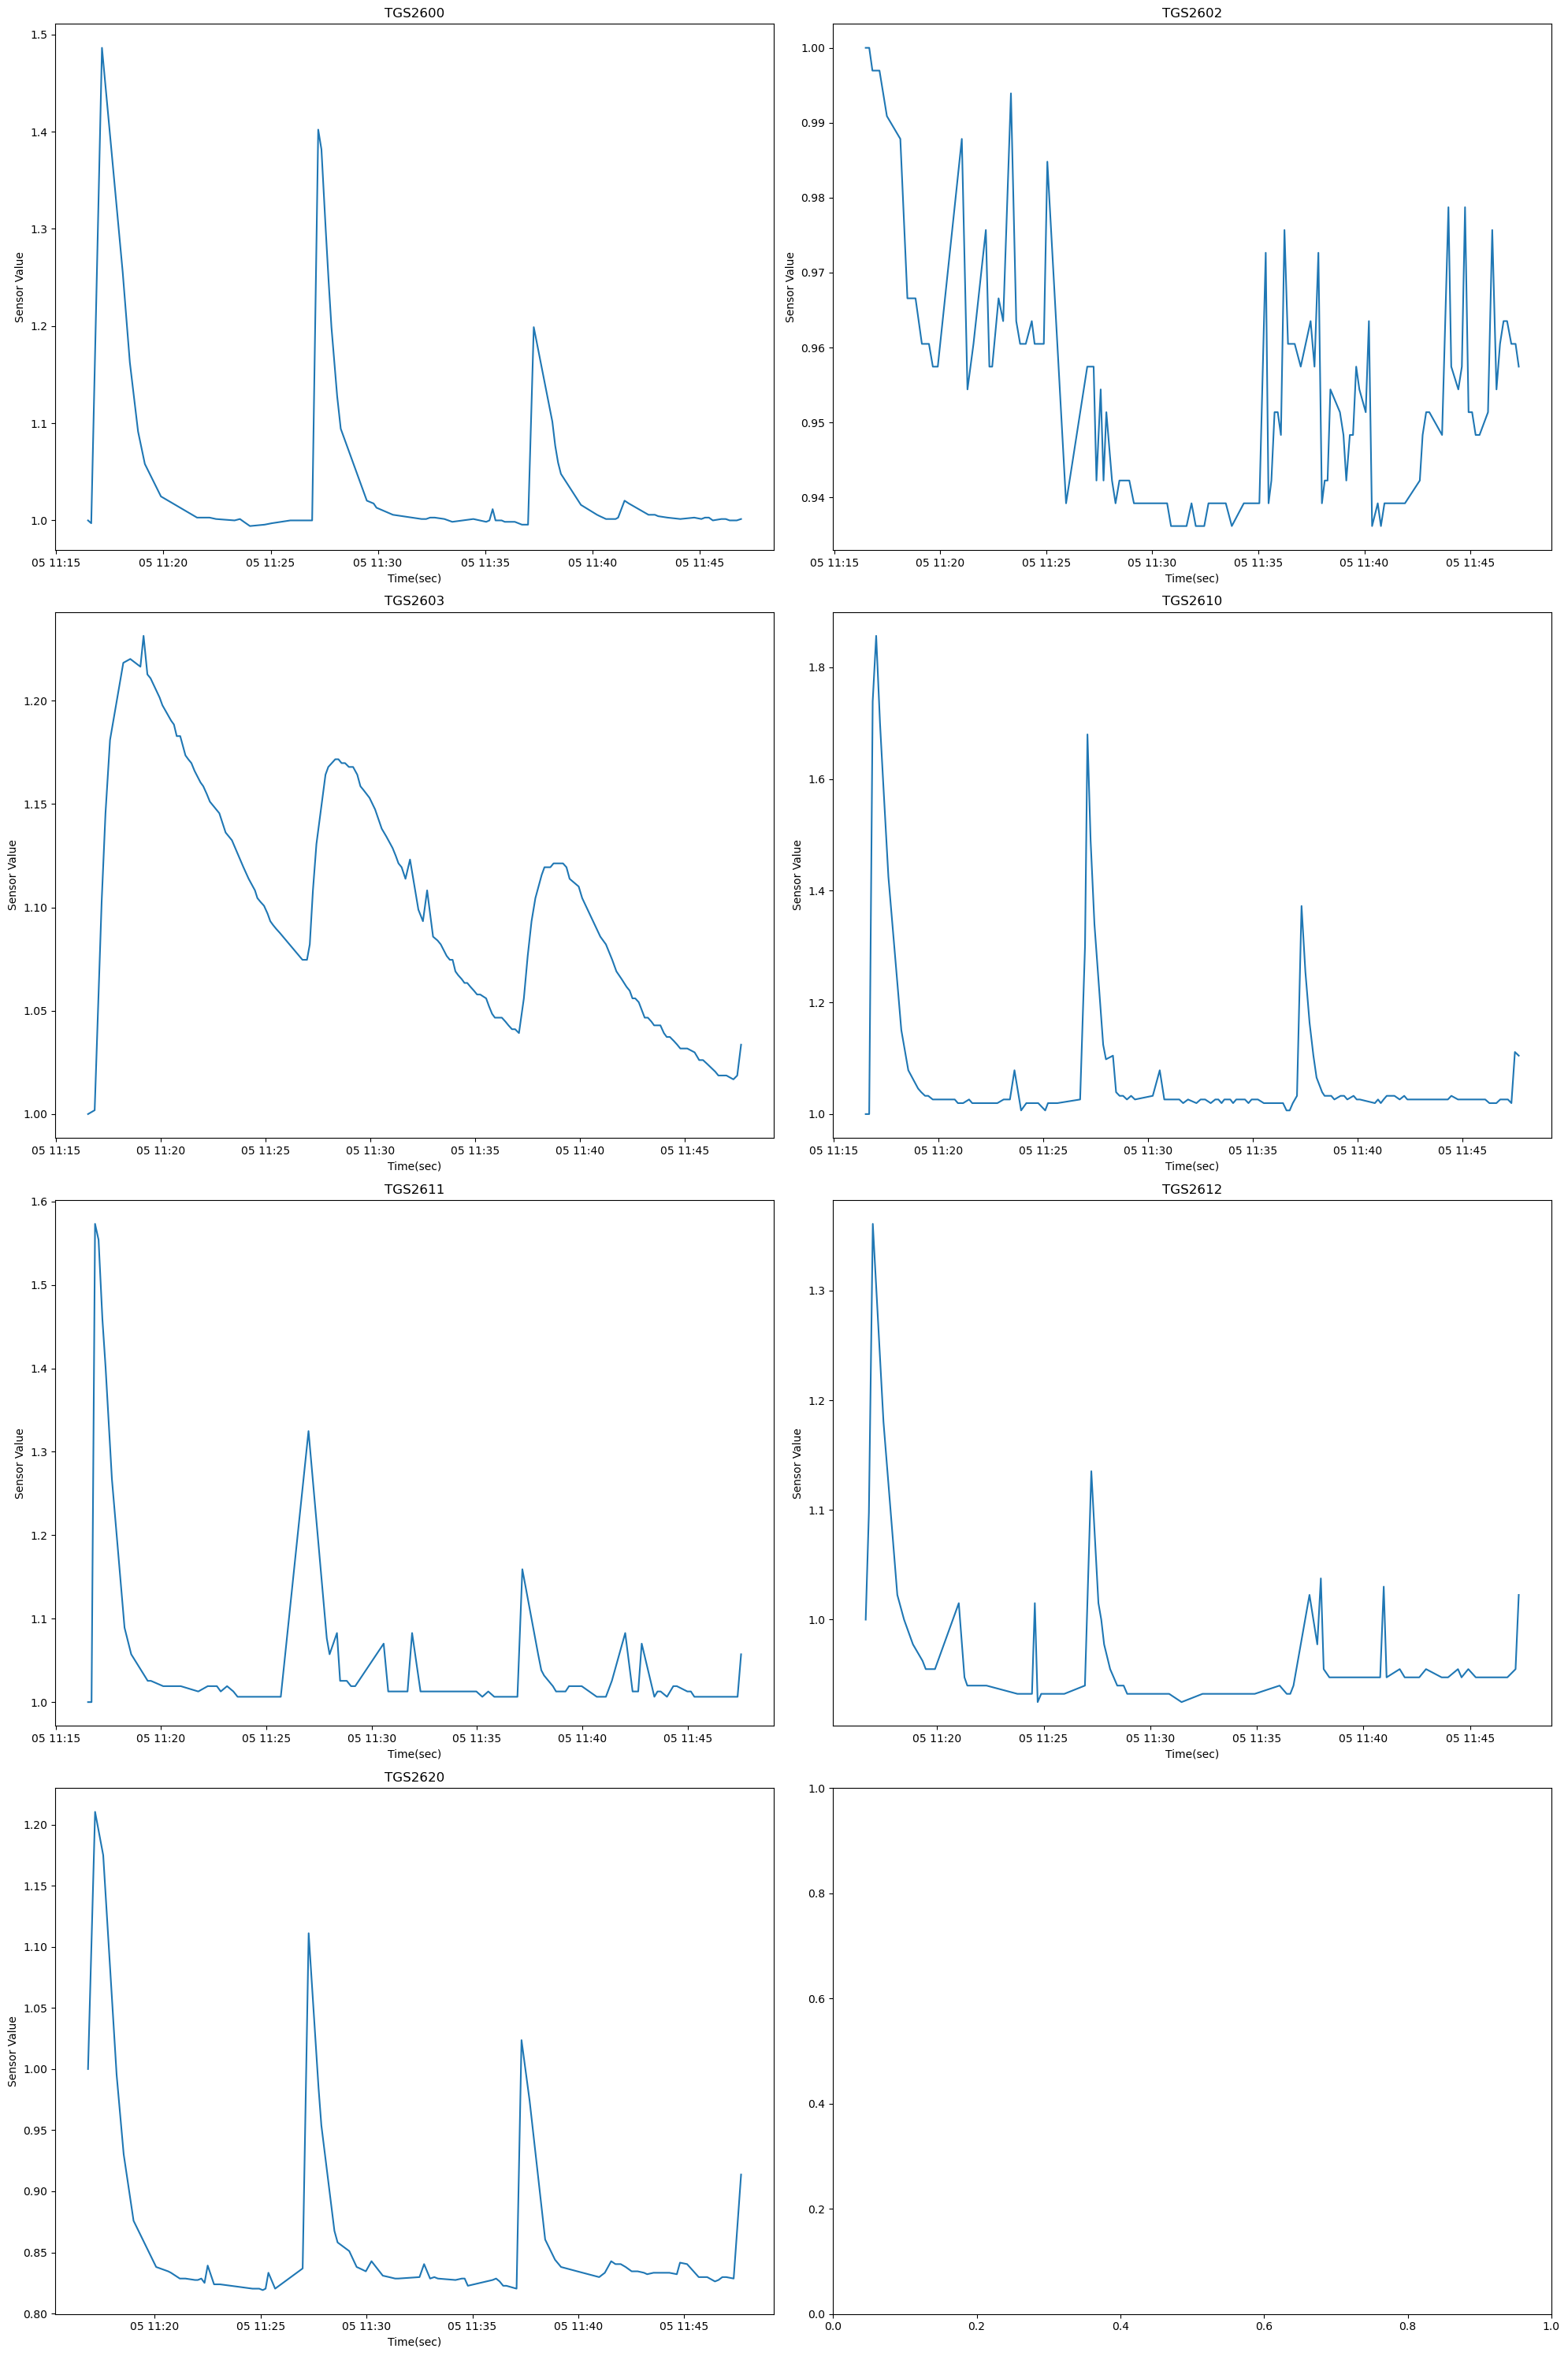

In [7]:
fig, axes = plt.subplots(nrows=len(sensor_dict)//2+1, ncols = 2, figsize=(20,30))
axes = axes.flatten()

for i, (sensor, data) in enumerate(sensor_dict.items()):
    data['Value'] = data['Value'].apply(pd.to_numeric)
    if data['Value'].iloc[0]!=0:
        data['Value'] = data['Value']/ data['Value'].iloc[0]
    ax = axes[i]
    ax.plot(data['Time'],data['Value'])
    ax.set_title(Title[i])
    ax.set_xlabel('Time(sec)')
    ax.set_ylabel('Sensor Value')
    #ax.set_xlim([-0.1,3500])
plt.tight_layout()